Condition 3.2: &emsp; $p\cdot q=a^2+b^4$

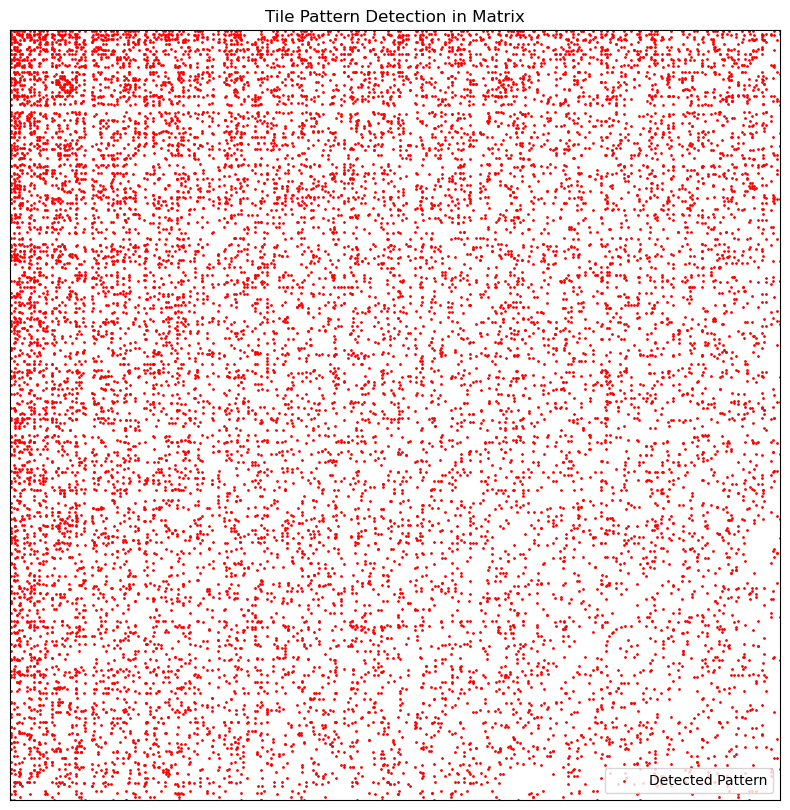

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import primerange

def detect_and_plot_tile_pattern(matrix, p_values, q_values, b_values, threshold=3):
    """
    Detects and plots tile-like patterns in the matrix based on the condition p * q = a^2 + b^4.

    :param matrix: The binary matrix with prime index data.
    :param p_values: List of prime numbers (p) to test.
    :param q_values: List of prime numbers (q) to test.
    :param b_values: List of natural numbers (b) to test.
    :param threshold: Threshold for detecting points near the pattern.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(matrix, interpolation='nearest', cmap="Greys")

    detected_points = []

    # Loop through all prime pairs and b values
    for p in p_values:
        for q in q_values:
            for b in b_values:
                b4 = b ** 4

                # Calculate a^2 values that satisfy the condition
                target_value = p * q - b4
                if target_value > 0:
                    a = int(np.sqrt(target_value))
                    if a ** 2 == target_value:
                        # Find indices in the matrix
                        p_index = p_values.index(p)
                        q_index = q_values.index(q)

                        if p_index < matrix.shape[0] and q_index < matrix.shape[1]:
                            matrix[p_index, q_index] = 1
                            detected_points.append((p_index, q_index))

    # Plot detected points in red
    detected_points = np.array(detected_points)
    if len(detected_points) > 0:
        ax.scatter(detected_points[:, 1], detected_points[:, 0], color="red", s=1, label="Detected Pattern")

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend()
    plt.title("Tile Pattern Detection in Matrix")
    plt.show()


# Beispiel-Daten
primes = list(primerange(3, 7000))
matrix_size = len(primes)
matrix_35 = np.zeros((matrix_size, matrix_size), dtype=int)

# Wähle relevante p und q Werte
p_values = primes[:3000]  # Nehmen wir 3000 Primzahlen
q_values = primes[:3000]  # Nehmen wir 3000 Primzahlen
b_values = range(1, 100)  # Teste b-Werte von 1 bis 99

# Plot the Tile Pattern
detect_and_plot_tile_pattern(matrix_35, p_values, q_values, b_values)


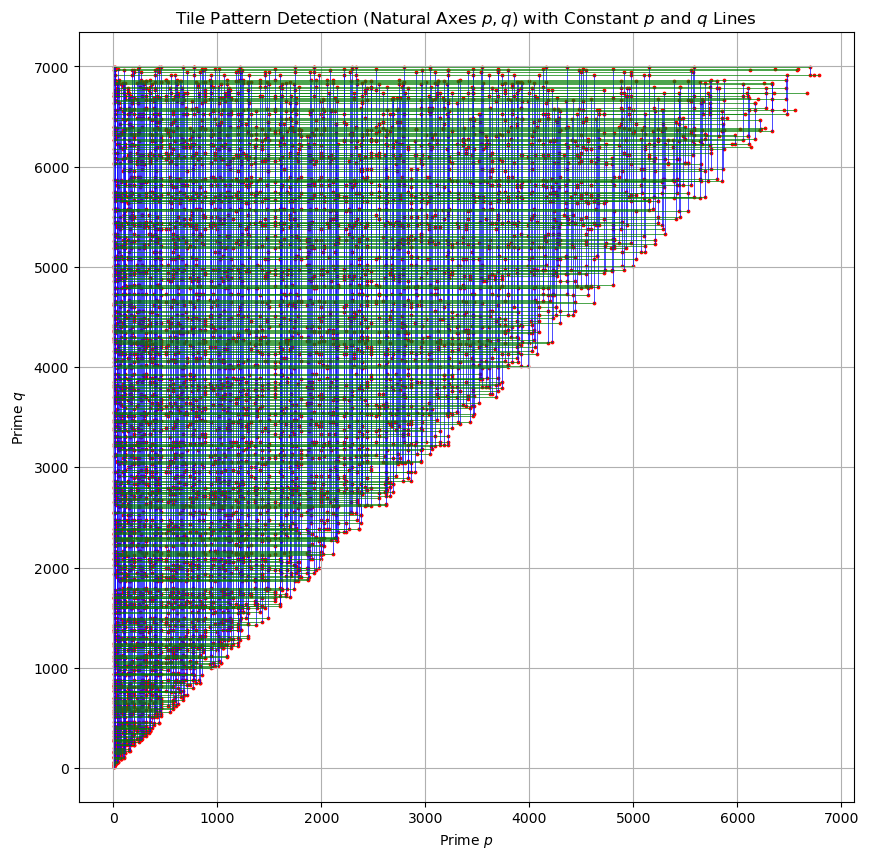

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import primerange

def detect_and_plot_tile_pattern(primes, b_values, threshold=3):
    """
    Detects and plots tile-like patterns in the prime matrix space (p, q), highlighting constant p or q lines.

    :param primes: List of prime numbers to test.
    :param b_values: List of natural numbers (b) to test.
    :param threshold: Threshold for detecting points near the pattern.
    """
    detected_points = []
    constant_p_lines = {}
    constant_q_lines = {}

    # Loop through all prime pairs and b values
    for i, p in enumerate(primes):
        for j, q in enumerate(primes):
            if p < q:  # Ensure p < q to avoid duplicate checking
                for b in b_values:
                    b4 = b ** 4

                    # Calculate a^2 values that satisfy the condition
                    target_value = p * q - b4
                    if target_value > 0:
                        a = int(np.sqrt(target_value))
                        if a ** 2 == target_value:
                            # Add the valid (p, q) pair to detected points
                            detected_points.append((p, q))
                            
                            # Track points by constant p or q lines
                            if p not in constant_p_lines:
                                constant_p_lines[p] = []
                            constant_p_lines[p].append(q)
                            
                            if q not in constant_q_lines:
                                constant_q_lines[q] = []
                            constant_q_lines[q].append(p)

    # Plotting the results
    fig, ax = plt.subplots(figsize=(10, 10))

    # Extract x and y values
    if detected_points:
        x_vals, y_vals = zip(*detected_points)
        ax.scatter(x_vals, y_vals, color="red", s=3, label="Detected Pattern")
    
    # Plot constant p lines
    for p, q_vals in constant_p_lines.items():
        ax.plot([p] * len(q_vals), q_vals, linestyle='-', linewidth=0.5, color="blue", label=f"Constant $p = {p}$")

    # Plot constant q lines
    for q, p_vals in constant_q_lines.items():
        ax.plot(p_vals, [q] * len(p_vals), linestyle='-', linewidth=0.5, color="green", label=f"Constant $q = {q}$")
    
    ax.set_xlabel("Prime $p$")
    ax.set_ylabel("Prime $q$")
    ax.set_title("Tile Pattern Detection (Natural Axes $p, q$) with Constant $p$ and $q$ Lines")
    plt.grid(True)
    plt.show()


# Beispiel-Daten
primes = list(primerange(3, 7000))  # Primzahlen bis 7000
b_values = range(1, 100)  # Teste b-Werte von 1 bis 99

# Plot the Tile Pattern
detect_and_plot_tile_pattern(primes, b_values)


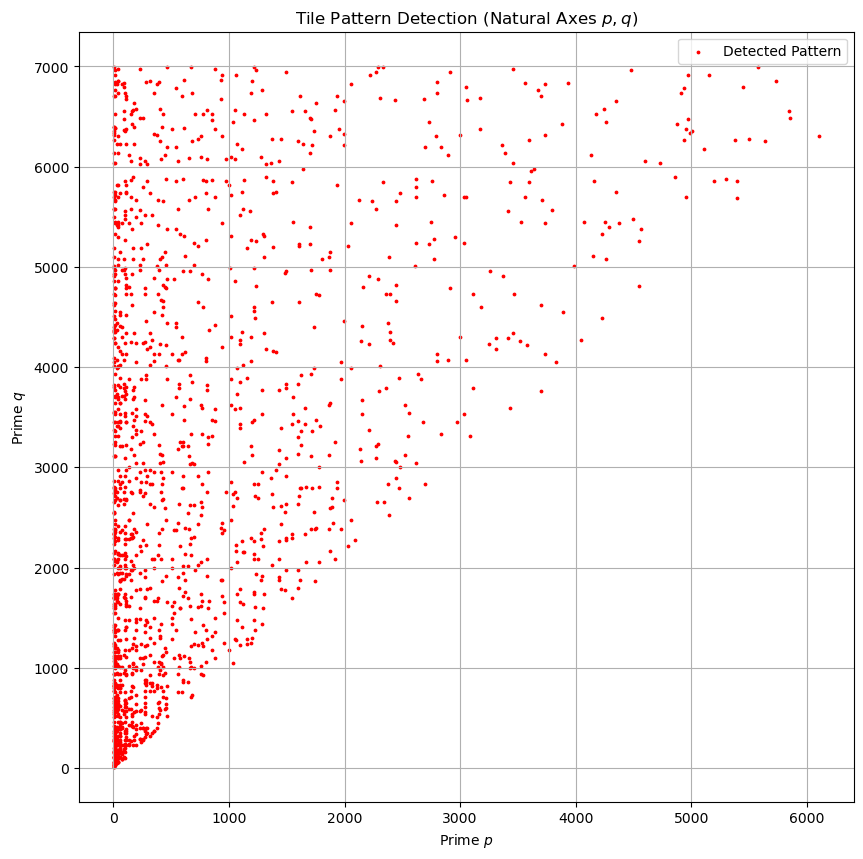

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import primerange

def detect_and_plot_tile_pattern(primes, b_values, threshold=3):
    """
    Detects and plots tile-like patterns in the prime matrix space (p, q).

    :param primes: List of prime numbers to test.
    :param b_values: List of natural numbers (b) to test.
    :param threshold: Threshold for detecting points near the pattern.
    """
    detected_points = []

    # Loop through all prime pairs and b values
    for i, p in enumerate(primes):
        for j, q in enumerate(primes):
            if p < q:  # Ensure p < q to avoid duplicate checking
                for b in b_values:
                    b4 = b ** 4

                    # Calculate a^2 values that satisfy the condition
                    target_value = p * q - b4
                    if target_value > 0:
                        a = int(np.sqrt(target_value))
                        if a ** 2 == target_value:
                            # Add the valid (p, q) pair to detected points
                            detected_points.append((p, q))

    # Plotting the results
    fig, ax = plt.subplots(figsize=(10, 10))

    # Extract x and y values
    if detected_points:
        x_vals, y_vals = zip(*detected_points)
        ax.scatter(x_vals, y_vals, color="red", s=3, label="Detected Pattern")
    
    ax.set_xlabel("Prime $p$")
    ax.set_ylabel("Prime $q$")
    ax.set_title("Tile Pattern Detection (Natural Axes $p, q$)")
    ax.legend()
    plt.grid(True)
    plt.show()


# Beispiel-Daten
primes = list(primerange(3, 7000))  # Primzahlen bis 7000
b_values = range(1, 10)  # Teste b-Werte von 1 bis 9

# Plot the Tile Pattern
detect_and_plot_tile_pattern(primes, b_values)
